In [0]:
  """Code for hypothesis testing of the datasets in order to determine the each of the previously tested null hypotheses
  may be proven or disprove. 
  Main focus is on the generation of linear regression models using different methods, along with approriate evaluation.
  
  #***************************************************************************************
  #  *    Title: Linear_Regression_Detailed_Implementation
  #  *    Author: Saishruthi Swaminathan
  #  *    Date: 18/01/2018
  #  *    Code version: 1.0
  #***************************************************************************************

In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('ageRatioJoin.csv', index_col=False, error_bad_lines=False)

In [0]:
df.head()

TotalSamplesAnnual  year  ...      Value        date
0                2695  1994  ...  32.567628  01/01/1994
1                2695  1994  ...  32.567628  01/01/1994
2                2695  1994  ...  32.567628  01/01/1994
3                2695  1994  ...  32.567628  01/01/1994
4                2695  1994  ...  32.567628  01/01/1994

[5 rows x 18 columns]

In [0]:
df.shape

(805693, 18)

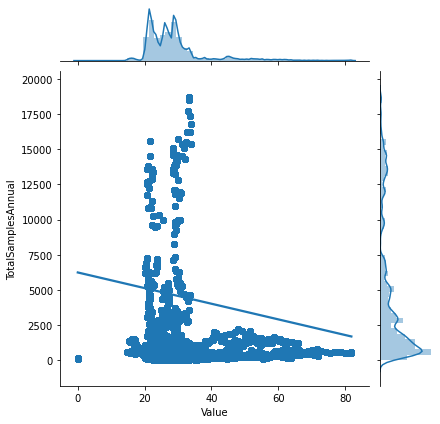

In [0]:
#Regression line is drawn over the points
sns.jointplot(x=df['Value'], y=df['TotalSamplesAnnual'], data=df, kind='reg')

In [0]:
#Split the data into test and train sets using and 80/20 split
x_train, x_test, y_train, y_test = train_test_split(df['Value'].values, df['TotalSamplesAnnual'].values, test_size=0.2, random_state=42)
print(x_train.shape)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))


print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

(644554,)
Train - Predictors shape (644554, 1)
Test - Predictors shape (161139, 1)
Train - Target shape (644554, 1)
Test - Target shape (161139, 1)


In [0]:
#linear regression model implemented using scikit library.
cls = linear_model.LinearRegression()
#Fit method is used for fitting training data into the model
is_nan = np.isnan(x_train)
not_nan = ~ is_nan
x_train = x_train[not_nan]

#remove any nan and inf values from the data
is_nan = np.isnan(y_train)
not_nan = ~ is_nan
y_train = y_train[not_nan]

x_train = np.reshape(x_train, (-1,1))
y_train = np.reshape(y_train, (-1,1))


is_inf = np.isinf(x_train)
not_inf = ~ is_inf
x_train = x_train[not_inf]

is_inf = np.isinf(y_train)
not_inf = ~ is_inf
y_train = y_train[not_inf]

x_train = np.reshape(x_train, (-1,1))
y_train = np.reshape(y_train, (-1,1))

y_train = y_train[:(len(x_train))]

cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#remove any nan and inf values from the data
is_nan = np.isnan(x_test)
not_nan = ~ is_nan
x_test = x_test[not_nan]

is_nan = np.isnan(y_test)
not_nan = ~ is_nan
y_test = y_test[not_nan]

x_test = np.reshape(x_test, (-1,1))
y_test = np.reshape(y_test, (-1,1))


is_inf = np.isinf(x_test)
not_inf = ~ is_inf
x_test = x_test[not_inf]

is_inf = np.isinf(y_test)
not_inf = ~ is_inf
y_test = y_test[not_inf]

x_test = np.reshape(x_test, (-1,1))
y_test = np.reshape(y_test, (-1,1))



y_test = y_train[:(len(x_test))]

prediction = cls.predict(x_test)

In [0]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [0]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[-55.68123582]]


In [0]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [6238.921995]


In [0]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 23966339.54393217


In [0]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value -0.011582434807103192


Text(0.5, 1.0, 'Linear Regression')

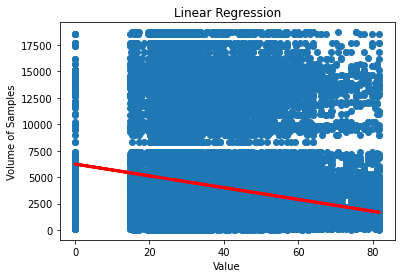

In [0]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Value')
plt.ylabel('Volume of Samples')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

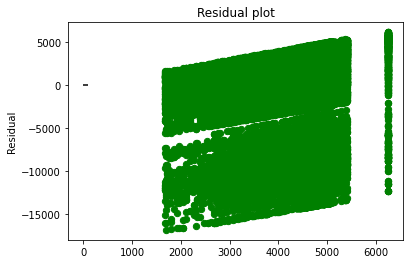

In [0]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [0]:
#Generate a linear regression with the use of normal equations
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    
    return theta

In [0]:
def predict_func(slope,intercept,x_test):
    
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i]) + intercept)
        
    return pred

In [0]:
def mse_calc(prediction, y_test):
    
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [0]:
def rsq(prediction, y_test):
    
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    
    r2 = 1 - (res_err / tot_err)
    return r2

In [0]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [6238.921995]
Slope of the model [-55.68123582]
Mean squared error of the model 23966339.543932125
R squared value -0.011582434807101194


Text(0, 0.5, 'Residual')

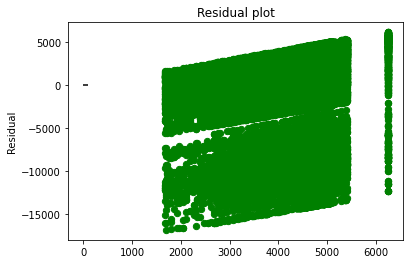

In [0]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [0]:
#Linear Regression using Gradient Descent
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [0]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
        
    return  s_slope, s_intercept

Slope of the model [139.29281459]
Intercept of the model [10.4950549]
Error value of the model [25832084.69338383]
R squared value -0.09033267605909479


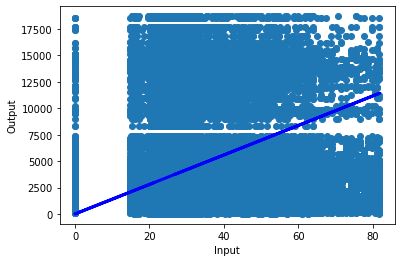

In [0]:
#defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 50
#intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()